In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plumed
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/usr/local/lib/libplumedKernel.so" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/usr/local/lib/libplumedKernel.so" +++


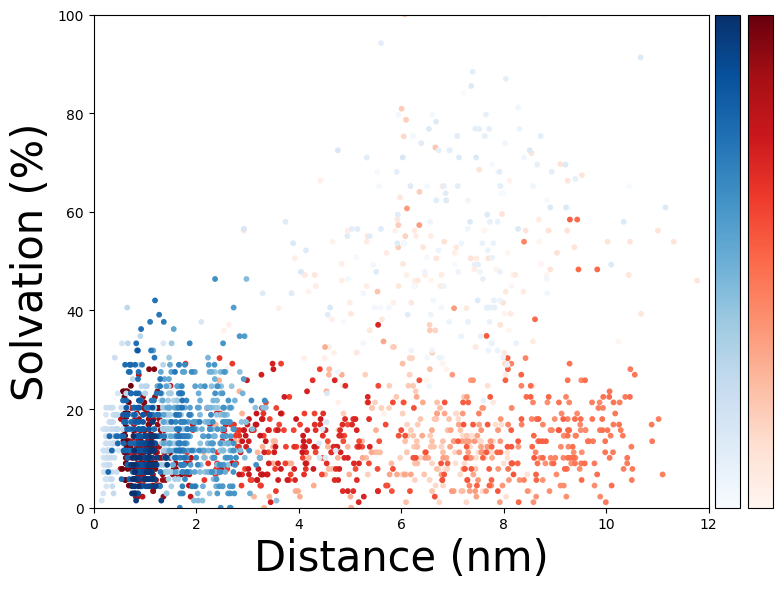

In [ ]:
def truncate_cmap(cmap_name, minval=0.2, maxval=1.0, n=256):
    cmap = cm.get_cmap(cmap_name, n)
    return LinearSegmentedColormap.from_list(
        f'{cmap_name}_trunc',
        cmap(np.linspace(minval, maxval, n))
    )
def read_data(dir, xvgfile, cv,stride=1):
    time, solvent_count = [], []
    with open(f'{dir}/{xvgfile}', 'r') as f:
        for line in f:
            if line.startswith(('@', '#')):
                continue
            time.append(float(line.split()[0]) / 1000)
            solvent_count.append(float(line.split()[1]))
    solvent_count = np.array(solvent_count)
    solvent_max = np.max(solvent_count)
    solvent_count = solvent_count / solvent_max * 100
    COLVAR = plumed.read_as_pandas(f'{dir}/binding_CV')
    dist = COLVAR.loc[:, f'{cv}'].iloc[::1]
    dist = np.array(dist)
    time = np.array(time)
    return dist[::stride], solvent_count[::stride], time[::stride]

dist1, solvent_count1, time1 = read_data('./10DEETunbiased9', 'Deet1.xvg', 'dD1',5)
dist2, solvent_count2, time2 = read_data('./10DEETunbiased2', 'Deet8.xvg', 'dD8',5)
plt.figure(figsize=(8,6))
cmap_red  = truncate_cmap('Reds',  minval=0.4)
cmap_blue = truncate_cmap('Blues', minval=0.4)
idx = np.argsort(time1)
x = dist1[idx]
y = solvent_count1[idx]

dx = np.diff(x)
dy = np.diff(y)

sc1 = plt.scatter(
    x, y,
    c=time1[idx],
    cmap=cmap_red,
    s=10,
    label='P2'
)

plt.quiver(
    x[:-1], y[:-1],   
    dx, dy,           
    angles='xy',
    scale_units='xy',
    scale=1,
    width=0.003,
    color='red',
    alpha=0.3
)
idx = np.argsort(time2)
x = dist2[idx]
y = solvent_count2[idx]

dx = np.diff(x)
dy = np.diff(y)

sc2 = plt.scatter(
    x, y,
    c=time2[idx],
    cmap=cmap_blue,
    s=10,
    label='P1'
)

plt.quiver(
    x[:-1], y[:-1],     
    dx, dy,             
    angles='xy',
    scale_units='xy',
    scale=1,
    width=0.003,
    color='blue',
    alpha=0.3
)
plt.xlabel('Distance (nm)', fontsize=30)
plt.ylabel('Solvation (%)', fontsize=30)
plt.xlim(0, 10)
plt.ylim(0, 100)

cbar1 = plt.colorbar(sc1, ax=plt.gca(), fraction=0.046, pad=0.005, ticks=[])
# cbar1.set_label('P2', fontsize=20)
cbar2 = plt.colorbar(sc2, ax=plt.gca(), fraction=0.046, pad=0.01, ticks=[])
# cbar2.set_label('P1', fontsize=20)

plt.tight_layout()
plt.savefig('P1_P2_binding_hydration.pdf', dpi=300)
plt.show()